In [1]:
import csv
import numpy as np
import random
import h5py
seed = 0
random.seed(seed)
np.random.seed(seed)
%matplotlib inline

In [9]:
# ----------------------------------------------------------------------------
# Acceleration Profile, Fixed Radius Z-Axis Scan
# ----------------------------------------------------------------------------
from dependencies import *
from vector_field import *

import seaborn as sns

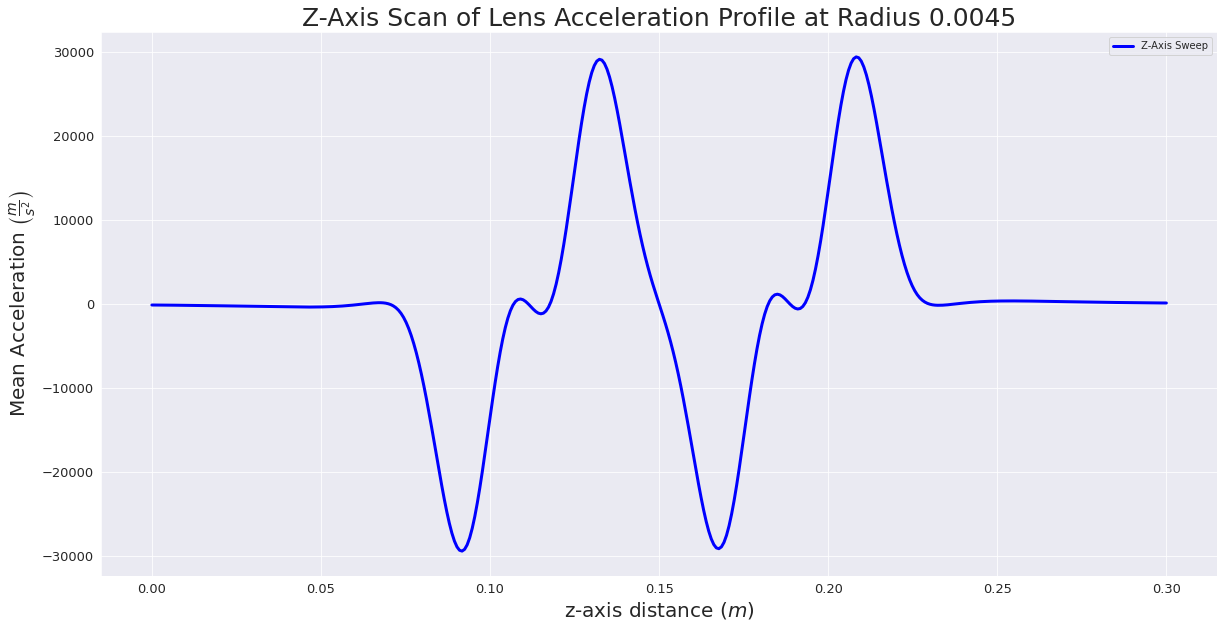

In [19]:
# set seaborn plotting style
sns.set_style("darkgrid")

# initialize values
z_scan = np.linspace(0, z_length / 1e3, mz)
thetas = np.linspace(0, 2 * np.pi, 100)
radius = r_inner / 4 /1e3
theta = np.pi / 2

# initialize arrays for storing acceleration
radial_acc = []

# loop through z_scan
for z_val in z_scan:

    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    
        # interpolation
    xCoord = round((r_inner / 1e3 + x) / l_xy)
    yCoord = round((r_inner / 1e3 + y) / l_xy)
    zCoord = round(z_val / l_z)
    
    # take mean of array and append it to the radial acc array
    radial_acc.append(force_field[int(yCoord), int(xCoord), int(zCoord)][2] / mass)

# plot results
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x=z_scan, y=radial_acc, label='Z-Axis Sweep', linewidth=3, color='b')

# formatting
plt.title('Z-Axis Scan of Lens Acceleration Profile at Radius {}'.format(radius), fontsize=25)
plt.ylabel(r'Mean Acceleration $\left( \frac{m}{s^2} \right)$', fontsize=20)
plt.xlabel(r'z-axis distance ($m$)', fontsize=20)
plt.tick_params(axis='both', labelsize=13)
# plt.xlim(left=0, right=0.05)

plt.show()

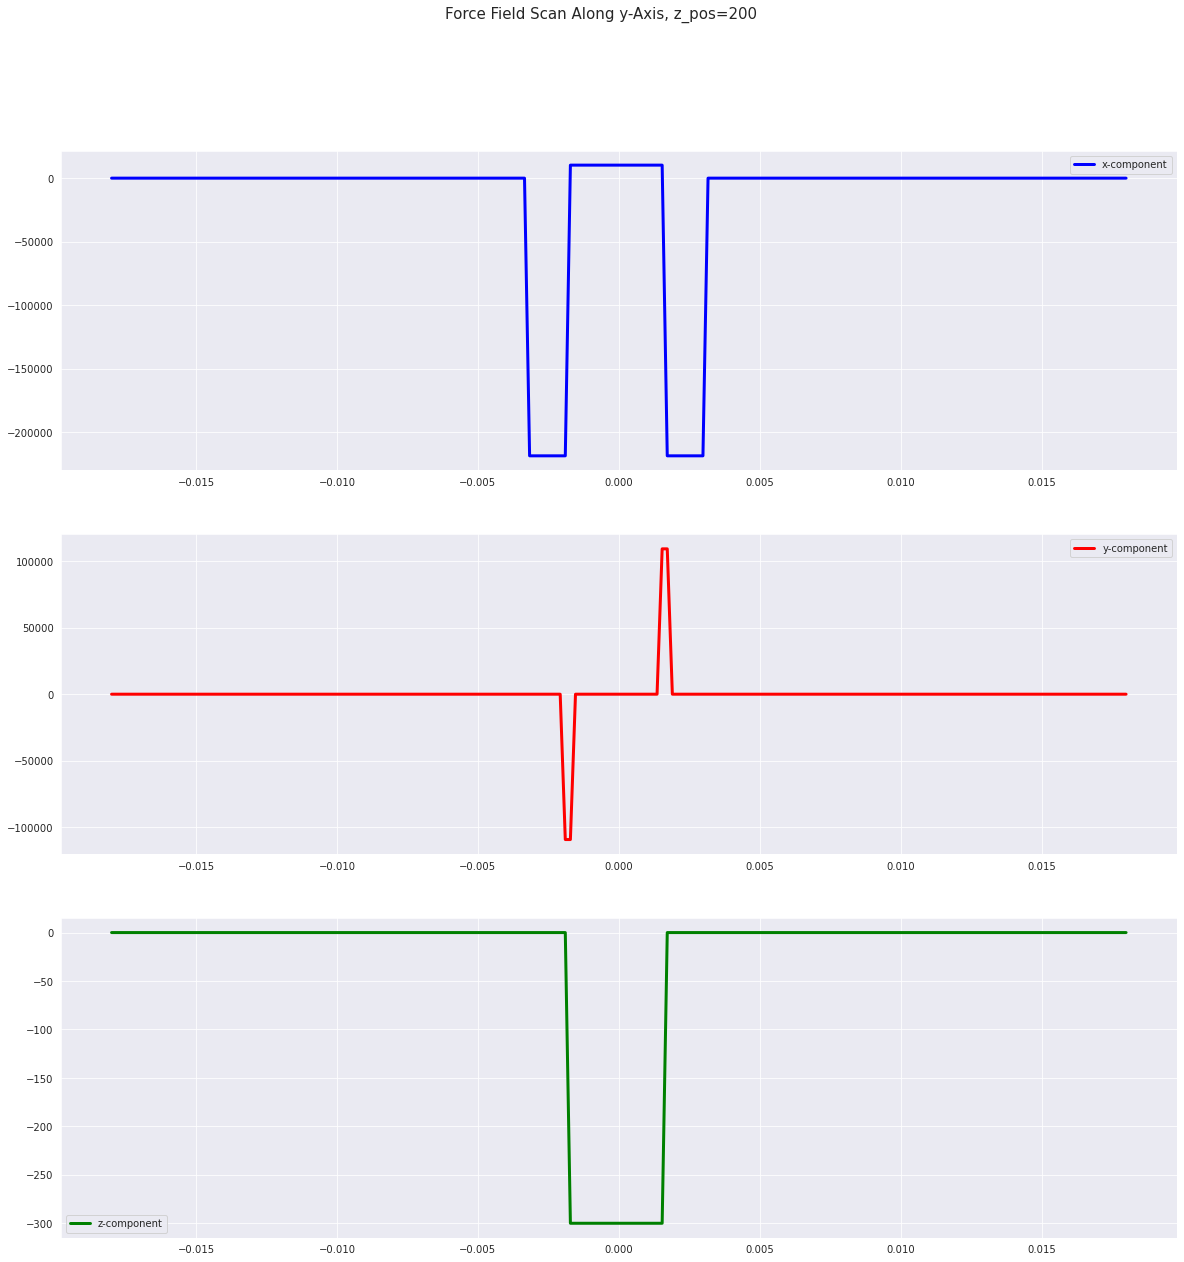

In [25]:
# ----------------------------------------------------------------------------
# acceleration components at fixed z-position
# ----------------------------------------------------------------------------
from vector_field import *

force_x = []
force_y = []

mesh = range(0, mxy)
xy = np.linspace(-1.8e-2, 1.8e-2, mxy)

z_pos = 200

for i in mesh:
    force_x.append(force_field[i, 0, z_pos]/mass)

force_x = np.array(force_x)

force_x_plt = [force_x[i, 0] for i in range(len(mesh))]
force_y_plt = [force_x[i, 1] for i in range(len(mesh))]
force_z_plt = [force_x[i, 2] for i in range(len(mesh))]
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
ax = ax.ravel()

ax[0].plot(xy, force_x_plt, label='x-component', linewidth=3, color='b')
ax[1].plot(xy, force_y_plt, label='y-component', linewidth=3, color='r')
ax[2].plot(xy, force_z_plt, label='z-component', linewidth=3, color='g')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.suptitle('Force Field Scan Along y-Axis, z_pos={}'.format(z_pos), fontsize=15)

plt.show()

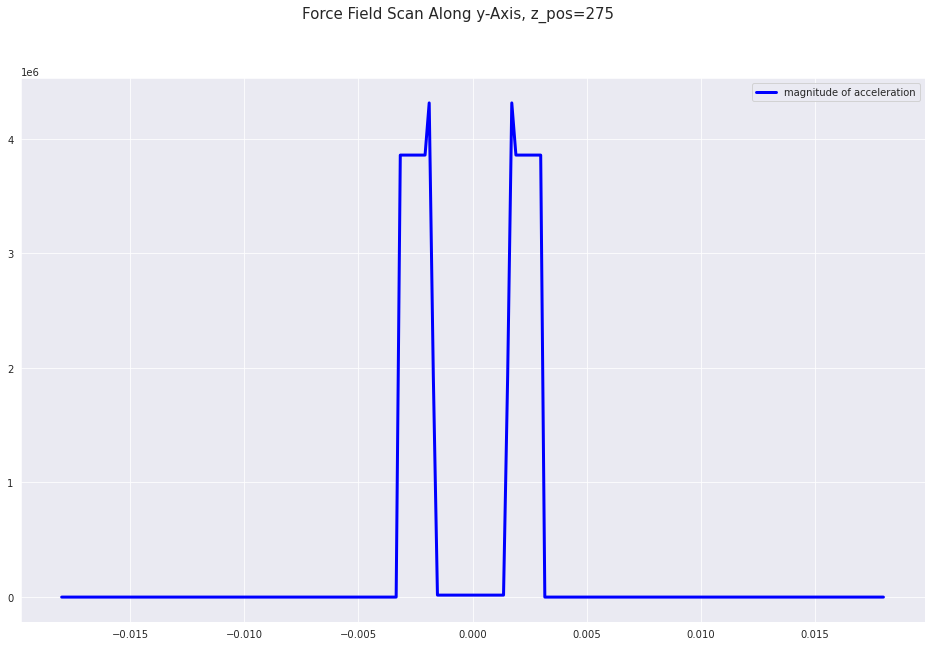

In [29]:
# ----------------------------------------------------------------------------
# magnitude of acceleration at fixed z-position
# ----------------------------------------------------------------------------
from vector_field import *

force = []
mesh = range(0, mxy)
xy = np.linspace(-1.8e-2, 1.8e-2, mxy)
z_pos = 275

for i in mesh:
    acc = np.linalg.norm(force_field[i, 0, z_pos] / mass)
    force.append(acc)

force = np.array(force)
fig, ax = plt.subplots(1, 1, figsize=(10*1.62, 10))
ax.plot(xy, force, label='magnitude of acceleration', linewidth=3, color='b')
ax.legend()
fig.suptitle('Force Field Scan Along y-Axis, z_pos={}'.format(z_pos), fontsize=15)
plt.show()

In [30]:
# Import matrices
hf_norm = h5py.File('b_matrix/normbMatrix_{}.h5'.format(mz), 'r')
normBMatrix = hf_norm[('Dataset1')]

In [31]:
normBMatrix.shape

(200, 200, 400)

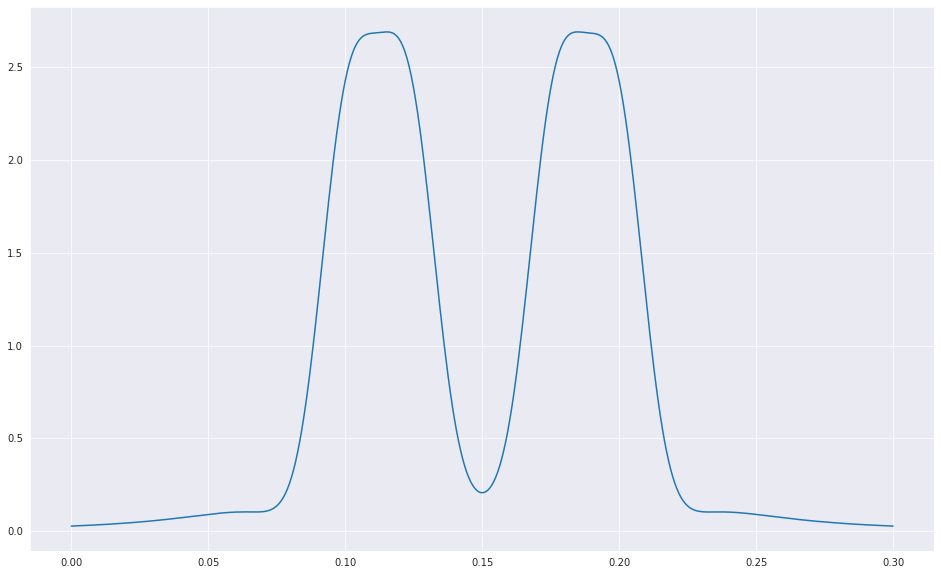

In [67]:
fig, ax = plt.subplots(figsize=(10*1.62, 10))
ax = plt.plot(np.linspace(0.0, 0.30, 400), normBMatrix[100,100,:])
plt.show()

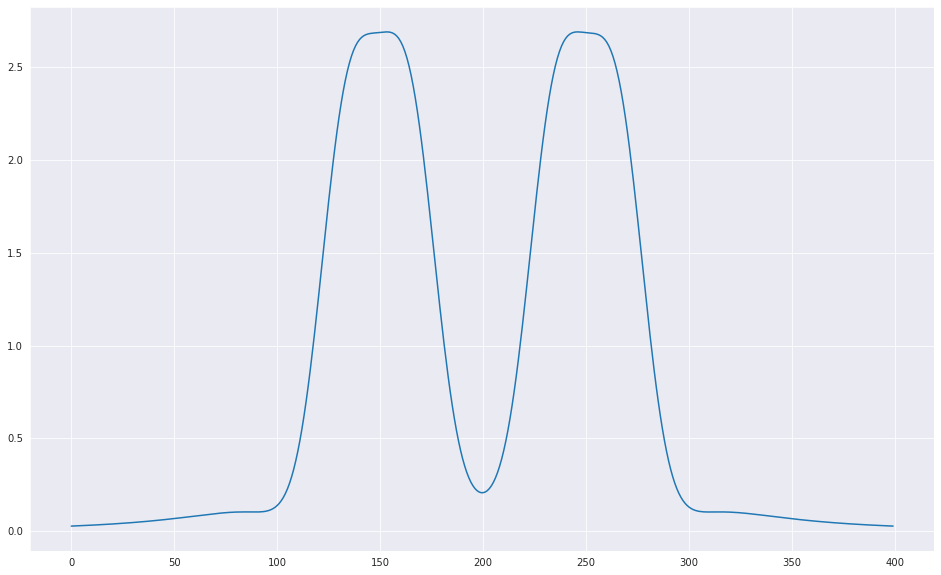

In [68]:
fig, ax = plt.subplots(figsize=(10*1.62, 10))
ax = plt.plot(np.arange(400), normBMatrix[100,100,:])
plt.show()

In [71]:
maxes = [np.argmax(normBMatrix[100,100,:200]), 201 + np.argmax(normBMatrix[100, 100, 201:])]
maxes

[153, 246]

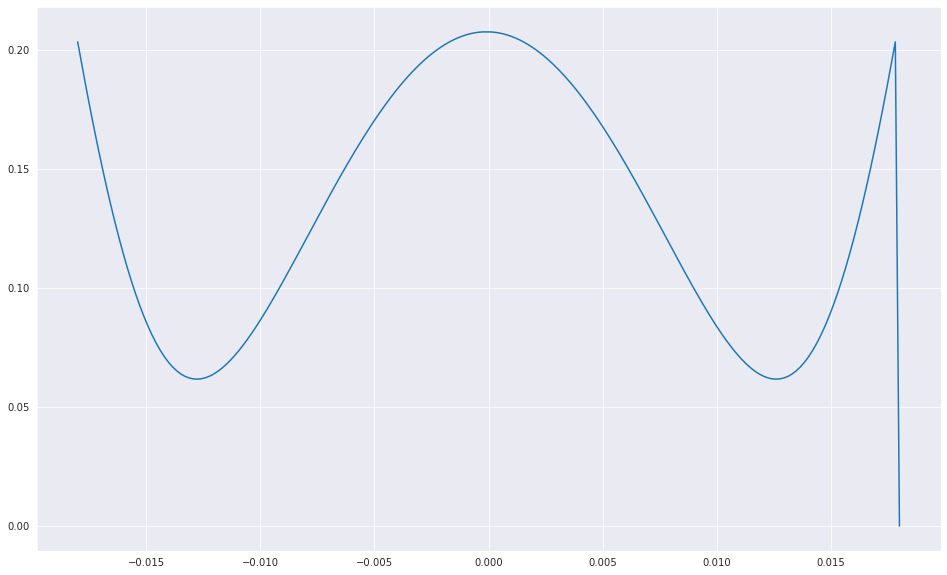

In [40]:
fig, ax = plt.subplots(figsize=(10*1.62, 10))
ax = plt.plot(np.linspace(-0.018, 0.018, 200), normBMatrix[:,100,200])
plt.show()

In [41]:
gradNormBx, gradNormBy, gradNormBz = np.gradient(normBMatrix, l_xy, l_xy, l_z)

In [42]:
gradNormBx.shape

(200, 200, 400)

(-500.0, 500.0)

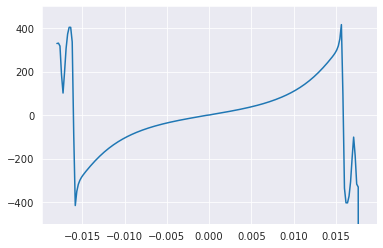

In [45]:
plt.plot(np.linspace(-0.018, 0.018, 200), gradNormBx[:, 100, 170])
plt.ylim(ymin=-500, ymax=500)

(-5e-21, 5e-21)

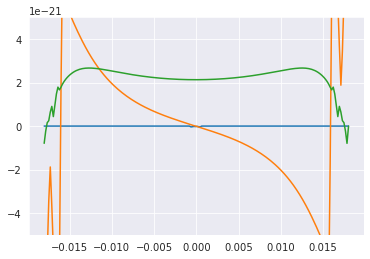

In [55]:
plt.plot(np.linspace(-0.018, 0.018, 200), force_field[:, 100, 170])
plt.ylim(ymin=-0.5e-20, ymax=0.5e-20)

In [56]:
force_field.shape

(200, 200, 400, 3)

(-5e-21, 5e-21)

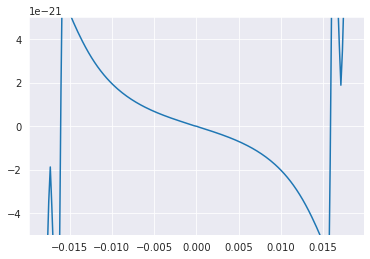

In [64]:
plt.plot(np.linspace(-0.018, 0.018, 200), force_field[:, 100, 170, 1])
plt.ylim(ymin=-0.5e-20, ymax=0.5e-20)